<a href="https://colab.research.google.com/github/prayas99/Face-Ageing/blob/main/Face_Ageing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/HasnainRaz/Fast-AgingGAN.git

Cloning into 'Fast-AgingGAN'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 52 (delta 19), reused 26 (delta 4), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
%cd /content/Fast-AgingGAN

/content/Fast-AgingGAN


In [ ]:
!ls

configs     gan_module.py  main.py    preprocessing	README.md
dataset.py  infer.py	   models.py  pretrained_model	timing.py


In [ ]:
!pip install pytorch_lightning

In [ ]:
!python infer.py --image_dir '/content/Fast-AgingGAN'

Traceback (most recent call last):
  File "infer.py", line 43, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "infer.py", line 33, in main
    img = Image.open(image_paths[i])
IndexError: list index out of range


In [ ]:
%cd /content

/content


In [ ]:
import os
image_dir = '/content/Fast-AgingGAN'
[os.path.join(image_dir, x) for x in os.listdir(image_dir) if
                   x.endswith('.png') or x.endswith('.jpg')]

['/content/Fast-AgingGAN/IMG_20210301_155652.jpg']

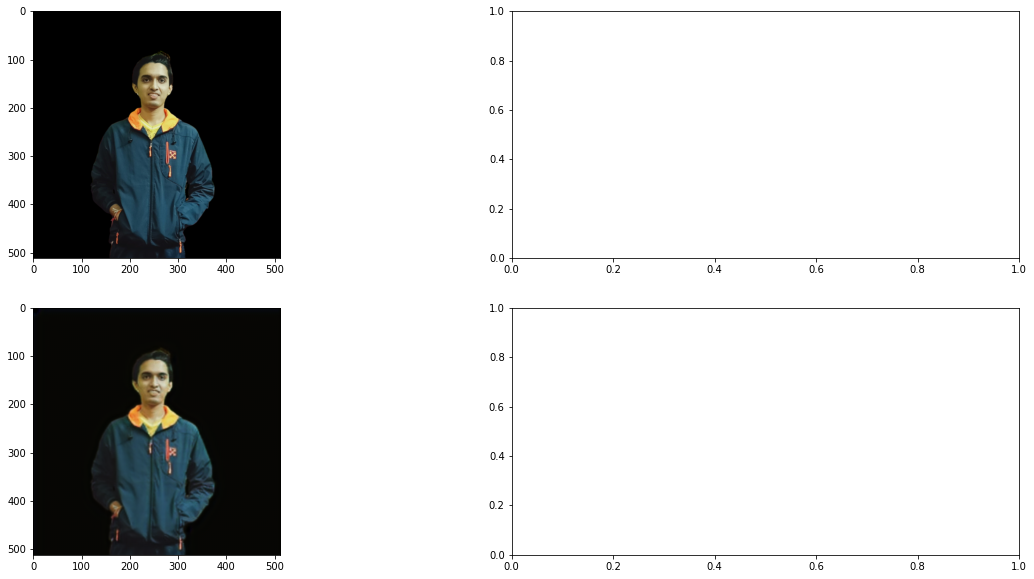

In [ ]:
import os
import random
from argparse import ArgumentParser

import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms

from gan_module import Generator

@torch.no_grad()
def main():
  image_paths = [os.path.join(image_dir, x) for x in os.listdir(image_dir) if
                    x.endswith('.png') ]
  model = Generator(ngf=32, n_residual_blocks=9)
  ckpt = torch.load('pretrained_model/state_dict.pth', map_location='cpu')
  model.load_state_dict(ckpt)
  model.eval()
  trans = transforms.Compose([
      transforms.Resize((512, 512)),
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
  ])
  fig, ax = plt.subplots(2, 2, figsize=(20, 10))
  random.shuffle(image_paths)
  for i in range(1):
      img = Image.open(image_paths[i]).convert('RGB')
      img = trans(img).unsqueeze(0)
      aged_face = model(img)
      aged_face = (aged_face.squeeze().permute(1, 2, 0).numpy() + 1.0) / 2.0
      ax[0, i].imshow((img.squeeze().permute(1, 2, 0).numpy() + 1.0) / 2.0)
      ax[1, i].imshow(aged_face)
  plt.show()


if __name__ == '__main__':
    main()

In [ ]:
!git clone https://github.com/dawei6875797/Face-Aging-with-Identity-Preserved-Conditional-Generative-Adversarial-Networks

Cloning into 'Face-Aging-with-Identity-Preserved-Conditional-Generative-Adversarial-Networks'...
remote: Enumerating objects: 163, done.
remote: Total 163 (delta 0), reused 0 (delta 0), pack-reused 163
Receiving objects: 100% (163/163), 1.69 MiB | 3.65 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
%cd /content/Face-Aging-with-Identity-Preserved-Conditional-Generative-Adversarial-Networks

/content/Face-Aging-with-Identity-Preserved-Conditional-Generative-Adversarial-Networks


In [ ]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.4.1 (from -r requirements.txt (line 1)) (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.6.0rc0)
ERROR: No matching distribution found for tensorflow-gpu==1.4.1 (from -r requirements.txt (line 1))


In [ ]:
!python test.py

2021-07-06 18:05:05.388414: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "test.py", line 55, in <module>
    shuffle=False, mode='train')
  File "./tools/data_generator.py", line 54, in __init__
    self.read_class_list(self.class_lists)
  File "./tools/data_generator.py", line 110, in read_class_list
    f = open(self.file_folder + class_lists[i], 'r')
FileNotFoundError: [Errno 2] No such file or directory: '/new_disk2/wangzw/tangxu/age_data/train_data/train_age_group_0.txt'
